<a href="https://colab.research.google.com/github/danielav081596/Proyecto_Integrador_Equipo5/blob/main/Avance2_Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Instituto Tecnológico y de Estudios Superiores de Monterrey**

##**Maestría en Inteligencia Artificial Aplicada**

### TC5035.10 Proyecto Integrador - "Modelación y predicción del impacto de las experiencias benevolentes en la infancia en las Condiciones de Bienestar Emocional (BCEs) en niños y adultos mexicanos"


#### Dra. Grettel Barceló Alonso - Asesor del proyecto

*Avance 1. Análisis exploratorio de datos*


**Equipo # 5**
* Karla Daniela Valenzuela A00819192
* Emmanuel Domínguez Bravo A01793683

En este primer avance realizamos un análisis exploratorio de los datos (EDA - Exploratory Data Analysis) donde examinamos los datos disponibles para encontrar patrones, detectar anomalías así como aplicar técnicas estadísticas para verificar premisas (Suresh & Usman, 2020) que nos sirvan como referencia para aplicar y justificar operaciones de preprocesamiento, necesarias para la correcta implementación de los modelos de aprendizaje automático correspondientes.

En el presente trabajo tomamos la base de datos proporcionada que consideraremos como los datos de entrenamiento, que consisten en las respuestas de salida de encuestas realizadas a un grupo de adultos que presentan ciertas patologías psicológicas. Los datos etiquetados los estaremos utilizando para entrenar modelos de clasificación multi-clase y multi-salida que aplicados a un conjunto de datos separado de encuestas realizadas a un grupo de niños, clasificar si de acuerdo con sus experiencias negativas y positivas vividas hasta ahora, presentarán un riesgo de padecer alguna de las patologías presentadas en el grupo de adultos.

In [ ]:
#!pip install pyreadstat

In [2]:
# importamos las librerías requeridas

import numpy as np
import pandas as pd
#import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
!pip install prince

In [4]:
! git clone https://github.com/danielav081596/Proyecto_Integrador_Equipo5.git

fatal: destination path 'Proyecto_Integrador_Equipo5' already exists and is not an empty directory.


In [5]:
# Leemos los archivos con extensión .sav que se nos proporcionaron
#df_adultos, meta = pyreadstat.read_sav('/content/2.1.Base de ACES_Adultos.sav')
#df_menores, meta = pyreadstat.read_sav('/content/2.2.Base de ACES_Menores.sav')

# Escribimos los datos en un archivo .csv
#df_adultos.to_csv('ACEs Adultos.csv', index=False)

In [6]:
# Creamos un dataframe del archivo .csv

df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


<ipython-input-6-2ec3293ece57>:3: DtypeWarning: Columns (87,525,538,539,540) have mixed types. Specify dtype option on import or set low_memory=False.
  df_adultos = pd.read_csv('/content/Proyecto_Integrador_Equipo5/ACEs Adultos.csv', encoding='latin1')


In [7]:
# La base de datos tiene 689 columnas:

df_adultos.head()

,FOLIO,FOLIO2,ID_ADULTO,TELEFONO,CORREO,BINOMIO,FILTRO,ENT,ENTIDAD,MUN,...,EDAD,INDIGENA,RELIGION,ESCOLARIDAD,NSEF,NSE5F,UPM,RURAL,PONDERADOR,AREA
0,0100108639999001-01,0100108639999001-01,1.0,4.493858e+09,yeimider1@gmail.com,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
1,0100108639999001-02,0100108639999001-02,3.0,4.495684e+09,NaN,0,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
2,0100108639999001-03,0100108639999001-03,1.0,4.494059e+09,Betomartiez89@gmail.com,1,2,1,AGUASCALIENTES,1,...,30.0,2.0,1.0,2.0,3.0,5.0,0100108639999,1.0,18619.783203,1.0
3,0100108639999001-04,0100108639999001-04,1.0,4.496682e+09,NaN,1,2,1,AGUASCALIENTES,1,...,26.0,2.0,1.0,2.0,1.0,1.0,0100108639999,1.0,18619.783203,1.0
4,0100108639999001-05,0100108639999001-05,1.0,4.492521e+09,NaN,1,2,1,AGUASCALIENTES,1,...,32.0,2.0,1.0,2.0,2.0,3.0,0100108639999,1.0,18619.783203,1.0


In [6]:
#!pip install git+https://github.com/Cauchemare/Light_FAMD.git

In [7]:
#pip install git+https://github.com/MaxHalford/Prince

In [8]:
# Renombramos columnas para facilitar su identificación

survey = {'AD_M07_50':"Seguridad alimentaria 2",'AD_M07_51':"Seguridad alimentaria 3",'AD_M07_52':"Seguridad alimentaria 4",
                     'AD_M07_53':"Seguridad alimentaria 5",'AD_M07_54':"Seguridad alimentaria 6",'AD_M07_55':"Seguridad alimentaria 7",
                     'AD_M09_95_01_1':"comportamiento_riesgo 1",'AD_M09_95_01_2':"comportamiento_riesgo 2",'AD_M09_95_01_3':"comportamiento_riesgo 3",'AD_M09_95_01_4':"comportamiento_riesgo 4",
                     'AD_M09_95_02_1':"comportamiento_riesgo 5",'AD_M09_95_02_2':"comportamiento_riesgo 6",'AD_M09_95_02_3':"comportamiento_riesgo 7",'AD_M09_95_02_4':"comportamiento_riesgo 8",
                     'AD_M09_95_03_1':"comportamiento_riesgo 9",'AD_M09_95_03_2':"comportamiento_riesgo 10",'AD_M09_95_03_3':"comportamiento_riesgo 11",'AD_M09_95_03_4':"comportamiento_riesgo 12",
                     'AD_M09_95_04_1':"comportamiento_riesgo 13",'AD_M09_95_04_2':"comportamiento_riesgo 14",'AD_M09_95_04_3':"comportamiento_riesgo 15",'AD_M09_95_04_4':"comportamiento_riesgo 16",
                     'AD_M09_95_05_1':"comportamiento_riesgo 17",'AD_M09_95_05_2':"comportamiento_riesgo 18",'AD_M09_95_05_3':"comportamiento_riesgo 19",'AD_M09_95_05_4':"comportamiento_riesgo 20",
                     'AD_M09_95_06_1':"comportamiento_riesgo 21",'AD_M09_95_06_2':"comportamiento_riesgo 22",'AD_M09_95_06_3':"comportamiento_riesgo 23",'AD_M09_95_06_4':"comportamiento_riesgo 24",
                     'AD_M09_96_01_1':"Depresión",'AD_M09_96_02_1':"Trastorno Bipolar",'AD_M09_96_03_1':"Ezquizofrenia",'AD_M09_96_04_1':"Estrés postrauma",
                     'AD_M09_96_05_1':"Anorexia Nerviosa",'AD_M09_96_06_1':"Bulimia Nerviosa",'AD_M09_96_07_1':"Ansiedad_encuesta", 'AD_M09_96_08_1':'TRASTORNO_LÍMITE_PERSONALIDAD',
                     'AD_M09_96_09_1':"Ideación Suicida",'AD_M09_96_10_1':"AUTOLESIONES NO SUICIDAS",'AD_M09_96_11_1':"DÉFICIT_ATENCIÓN_HIPERACTIVIDAD",'AD_M09_96_12_1':"Alcoholismo",
                     'AD_M09_96_13_1':"Consumo_Sustancias",'AD_M09_96_14_1':"Autismo",'AD_M09_96_15_1':"Otro Trastorno",'AD_M09_97_01':"Síntomas_trastornos_1",'AD_M09_97_02':"Síntomas_trastornos_2",
                     'AD_M09_97_03':"Síntomas_trastornos_3",'AD_M09_97_04':"Síntomas_trastornos_4",'AD_M09_97_05':"Síntomas_trastornos_5",'AD_M09_97_02':"Síntomas_trastornos_2"}

df_adultos = df_adultos.rename(columns=survey)


In [9]:
# List of columns to rename - Positive experiences
positive_att = {'AD_M10_115_01': 'Exp_pos_1','AD_M10_115_02': 'Exp_pos_2','AD_M10_115_03': 'Exp_pos_3','AD_M10_115_04': 'Exp_pos_4','AD_M10_115_05': 'Exp_pos_5',
                'AD_M10_115_06': 'Exp_pos_6','AD_M10_115_07': 'Exp_pos_7','AD_M10_115_08': 'Exp_pos_8','AD_M10_115_09': 'Exp_pos_9','AD_M10_115_10': 'Exp_pos_10',
                'AD_M10_116_01': 'Exp_pos_11','AD_M10_116_02': 'Exp_pos_12','AD_M10_116_03': 'Exp_pos_13','AD_M10_116_04': 'Exp_pos_14','AD_M10_116_05': 'Exp_pos_15',
                'AD_M10_116_06': 'Exp_pos_16','AD_M10_116_07': 'Exp_pos_17','AD_M11_117': 'Bienestar_1','AD_M11_118': 'Bienestar_2','AD_M12_120_01': 'Co_social_1',
                'AD_M12_120_02': 'Co_social_2','AD_M12_120_03': 'Co_social_3','AD_M12_120_04': 'Co_social_4','AD_M12_120_05': 'Co_social_5','AD_M12_120_06': 'Co_social_6',
                'AD_M12_120_07': 'Co_social_7','AD_M12_120_08': 'Co_social_8','AD_M12_120_09': 'Co_social_9','AD_M12_120_10': 'Co_social_10','AD_M12_120_11': 'Co_social_11',
                'AD_M12_120_12': 'Co_social_12','AD_M12_120_13': 'Co_social_13','AD_M12_120_14': 'Co_social_14','AD_M12_120_15': 'Co_social_15','AD_M12_120_16': 'Co_social_16'}

In [10]:
# Renombramos las columnas
df_adultos = df_adultos.rename(columns=positive_att)

In [11]:
# Creamos un nuevo data frame con columnas que deseamos investigar como datos de entrada

col_list = ['Exp_pos_1','Exp_pos_2','Exp_pos_3','Exp_pos_4','Exp_pos_5',
                'Exp_pos_6','Exp_pos_7','Exp_pos_8','Exp_pos_9','Exp_pos_10',
                'Exp_pos_11','Exp_pos_12','Exp_pos_13','Exp_pos_14','Exp_pos_15',
                'Exp_pos_16','Exp_pos_17','Bienestar_1','Bienestar_2','Co_social_1',
                'Co_social_2','Co_social_3','Co_social_4','Co_social_5','Co_social_6',
                'Co_social_7','Co_social_8','Co_social_9','Co_social_10','Co_social_11',
                'Co_social_12','Co_social_13','Co_social_14','Co_social_15','Co_social_16']

#df_adultos_new = pd.DataFrame(df_adultos, columns=col_list)

In [12]:
# Agregamos columnas de datos generales complementarios

col_grales = ['SEXO','EDAD','INDIGENA','Situación Laboral', 'Religiosidad', 'Estado Civil','Estudios padres', 'Ocupación','ESCOLARIDAD',
              'Rango salarial','Servicio de salud',"NIV_SEG","AREA"]

#df_adultos_new[col_grales]=df_adultos[col_grales]


In [21]:
# Agregamos las respuestas de experiencias negativas (ACEs)
ACES = {'Indicador01':'ACE1','Indicador02':'ACE2','Indicador03':'ACE3',
        'Indicador04':'ACE4','Indicador05':'ACE5','Indicador06':'ACE6',
        'Indicador07':'ACE7','Indicador08':'ACE8','Indicador09':'ACE9',
        'Indicador10':'ACE10','Indicador11':'ACE11','Indicador12':'ACE12',
        'Indicador13':'ACE13'}
df_adultos=df_adultos.rename(columns=ACES)

In [14]:
#Agregamos las métricas de experiencias positivas aplicadas por los analistas a los encuestados

metrics = ['EX_BENEVOLENTES','FORTALEZAS','FELICIDAD','PROSOCIALIDAD','SUM_TOTAL']
df_adultos[metrics]=df_adultos[metrics]
df_adultos.rename(columns={'SUM_TOTAL':'SUM_EX_POS'},inplace=True)

In [15]:
# Renombramos la columna 'NIV_SEG'
df_adultos.rename(columns={'NIV_SEG':'NIV_SEG_ALIMENTARIA'}, inplace=True)

In [16]:
#df_adultos = df_adultos.drop(columns=df_adultos.columns[df_adultos.columns.str.contains('INT_ID\$[0-9]+', case=False)])
#df_adultos = df_adultos.drop(columns=df_adultos.columns[df_adultos.columns.str.contains('OTRO\$[0-9]+', case=True)])
import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'BINOMIO_[0-1]',
    'FILTRO_[1-6]',
    'ENT_[1-9]|ENT_1[1-7]',
    'ENTIDAD_.+',
    'MUN_.+',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[2-7]_0711200199999001-05',
    'FOLIO_COMP$01',
    'FOLIO_COMP$02', 'FOLIO_COMP$03', 'FOLIO_COMP$04', 'FOLIO_COMP$05',
    'FOLIO_COMP$06', 'FOLIO_COMP$07', 'FOLIO_COMP$08', 'FOLIO_COMP$09',
    'FOLIO_COMP$10', 'FOLIO_COMP$11', 'FOLIO_COMP$12', 'INT_ID$01',
    'INT_ID$02', 'INT_ID$03', 'INT_ID$04', 'INT_ID$05', 'INT_ID$06',
    'INT_ID$07', 'INT_ID$08', 'INT_ID$09', 'INT_ID$10', 'INT_ID$11',
    'INT_ID$12', 'OTRO$01', 'OTRO$02', 'OTRO$03', 'OTRO$04', 'OTRO$05',
    'OTRO$06', 'OTRO$07', 'OTRO$08', 'OTRO$09', 'OTRO$10', 'OTRO$11',
    'OTRO$12','FOLIO', 'FOLIO2', 'ID_ADULTO', 'BINOMIO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS', 'SEXO[$][0-9]*','EDAD[$][0-9]*',
    'ESPANOL[$][0-9]*','INDIGENA[$][0-9]*','LEER[$][0-9]*','DISCAPACIDAD[$][0-9]*']

# Use filter and regex to drop columns (case-insensitive)
#df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains('|'.join(map(re.escape, variables_to_drop)), case=False)]]

#for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
 #   df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains(variable_pattern, case=False)]]


In [151]:
df_adultos2 = df_adultos.copy()

In [152]:
# Identificamos las columnas de datos generales

import re

variables_to_drop = ['ID_ADULTO_[1-7]\.0',
    'NOTA[0-9]*',
    'FILTRO_[1-6]',
    'OTRO\$[0-9]',
    'ENT',
    'ENTIDAD',
    'MUN',
    'MUNICIPIO_[A-Z ]+',
    'TELEFONO',
    'CORREO',
    'LOCALIDAD_[A-Z ]+'
    'FOLIO_COMP\$0[0-9]*',
    'INT_ID\$[0-9]*',
    'FOLIO', 'FOLIO2', 'ID_ADULTO', 'FILTRO', 'ENTIDAD',
    'MUNICIPIO', 'LOCALIDAD', 'ECUESTADOR', 'MAQUINA', 'GPS1', 'LATITUD',
    'LONGITUD','SELECCIONADOS','INT_ID', 'OTRO','FOLIO','LATITUD',
    'LONGITUD','LOC','FVIS','MZN', 'AD_M07B']

# Use filter and regex to drop columns (case-insensitive)
#df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains('|'.join(map(re.escape, variables_to_drop)), case=False)]]


for variable_pattern in variables_to_drop:
    # Use filter and regex to drop columns (case-insensitive)
    df_adultos2 = df_adultos2[df_adultos2.columns[~df_adultos2.columns.str.contains(variable_pattern, case=False)]]


In [ ]:
#df_adultos2 = df_adultos.copy()
list(df_adultos2.columns)

In [40]:
#df_adultos2 = df_adultos2.select_dtypes(include='number')

# Drop columns with NaN values (numeric columns)
#df_adultos2 = df_adultos2.dropna(axis=1)
view = df_adultos2.filter(like='AD_M09_96_09_')
view.describe()

,AD_M09_96_09_2,AD_M09_96_09_3,AD_M09_96_09_4,AD_M09_96_09_5,AD_M09_96_09_6,AD_M09_96_09_7
count,64.000000,64.000000,0.0,64.000000,64.000000,64.000000
mean,26.781250,1.390625,NaN,3.078125,10.234375,1.640625
std,16.201576,0.491747,NaN,11.682716,25.368861,0.483610
min,8.000000,1.000000,NaN,1.000000,1.000000,1.000000
25%,15.000000,1.000000,NaN,1.000000,2.000000,1.000000
50%,23.000000,1.000000,NaN,2.000000,3.000000,2.000000
75%,33.500000,2.000000,NaN,2.000000,4.000000,2.000000
max,99.000000,2.000000,NaN,95.000000,99.000000,2.000000


In [ ]:
#df_adultos2 = df_adultos2.select_dtypes(include='object')

In [ ]:
pca = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(df_adultos2)

In [ ]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,8.091,13.71%,13.71%
1,2.650,4.49%,18.21%
2,2.608,4.42%,22.63%


In [ ]:
pca.plot(
    df_adultos2,
    x_component=0,
    y_component=1,

    show_row_markers=True,
    show_column_markers=True,
    show_row_labels=False,
    row_labels_column=None,  # for DataFrames with a MultiIndex
    show_column_labels=False
)

alt.LayerChart(...)

In [ ]:
pca.row_contributions_.style.format('{:.0%}')

In [ ]:
contributions = pca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [ ]:
contrib_df.to_csv('contributions_PCA_3comp V2.csv')

In [160]:

#df_adultos2.head()
view = df_adultos2.filter(like='Depresión')
view.value_counts()


Depresión_1
1              1057
0               411
dtype: int64

In [115]:
from collections import Counter
#counts=Counter(df_adultos2['ACE1'])
#counts.most_common()
value = df_adultos2['ACE1'].mode()
value


0    0
Name: ACE1, dtype: int64

In [153]:
# Imputamos la moda para valores categóricos
for col in df_adultos2:
    mode_value = df_adultos2[col].mode()
    df_adultos2[col].fillna(mode_value, inplace=True)


In [148]:
# Definimos una función para utilizar una frecuencia mínima de ocurrencia
# para reducir el número de categorías para las variables con alta cardinalidad

from collections import Counter

def cumulatively_categorise(column):

  #Replace all instances not in our new categories by 0
  new_column=column.eq(column.mode()).astype(int)

  #Return transformed column and unique values if return_categories=True
  return new_column

In [139]:
# Definimos una función que sustituye los valores de cada columna con 1 cuando el valor boolean
# de la comparación de cada elemento con la moda de la columna es True y 0 cuando es False

def categorize_by_mode(column):
    mode_values = column.mode()
    if not mode_values.empty:
        mode_value = mode_values.iloc[0]
        return column.eq(mode_value).astype(int)
    else:
        return pd.Series(0, index=column.index)

In [ ]:
# Aplicamos la función definida anteriormente al data frame

for col in df_adultos2:
    # One-hot encoding para columnas binarias
    if df_adultos2[col].nunique() == 2:
        df_adultos2 = pd.get_dummies(df_adultos2, columns=[col], drop_first=True)
    else:
        # Aplicamos la función que creamos a cada elemento del data frame
        df_adultos2 = df_adultos2.apply(categorize_by_mode)


In [155]:
import prince

mca = prince.MCA(one_hot=False,n_components=5, random_state=42)
mca_result = mca.fit(df_adultos2)

In [224]:
# obtain main components
main_components_data = mca_result.eigenvalues_summary
main_components_data

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.014,9.10%,9.10%
1,0.008,5.06%,14.16%
2,0.007,4.71%,18.88%
3,0.006,3.96%,22.84%
4,0.004,2.97%,25.80%


In [223]:
mca.plot(
    df_adultos2,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False
)

alt.LayerChart(...)

In [208]:
contributions = mca.column_contributions_.style.format('{:.0%}')
contrib_df = pd.DataFrame(contributions.data)

In [221]:

# Sorting values in descending order
sorted_column =contrib_df[0].sort_values(ascending=False)

# Creating a new DataFrame with variables that make up 85% of cumulative sum
cumulative_percent_threshold = .85
cumulative_sum = 0
selected_variables = []

for variable, value in sorted_column.items():
    cumulative_sum += float(value)
    selected_variables.append(variable)

    if cumulative_sum >= cumulative_percent_threshold:
        break

x_train = df_adultos2[selected_variables]

In [222]:
x_train.shape

(1468, 86)

In [159]:
contrib_df.to_csv('contributions_column_5comp_V15.csv')

In [ ]:
input_data = pd.DataFrame(mca.column_cosine_similarities(df_adultos)).astype(float)

In [ ]:
input_data.to_csv('similarities.csv')

In [229]:
# Renombramos las variables dependientes

y_train_col = {'DxPHQ9':'Depresion', 'DxGAD7':'Ansiedad','DxPCL5':'TRANSTORNO_ESTRES POSTRAUMÁTICO','Dx_SCOFF':'SOSPECHA DE ANOREXIA/BULIMIA'}


df_adultos2.rename(columns=y_train_col, inplace=True)


In [ ]:
diag_lst = ['Depresion', 'Ansiedad','TRANSTORNO_ESTRES POSTRAUMÁTICO','SOSPECHA DE ANOREXIA/BULIMIA']


#df_adultos_new[diag_lst]=df_adultos[diag_lst]
list(df_adultos2.columns)

In [ ]:
# Definimos nuestro conjunto de datos de salida etiquetados

y_train = df_adultos2[['Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']]

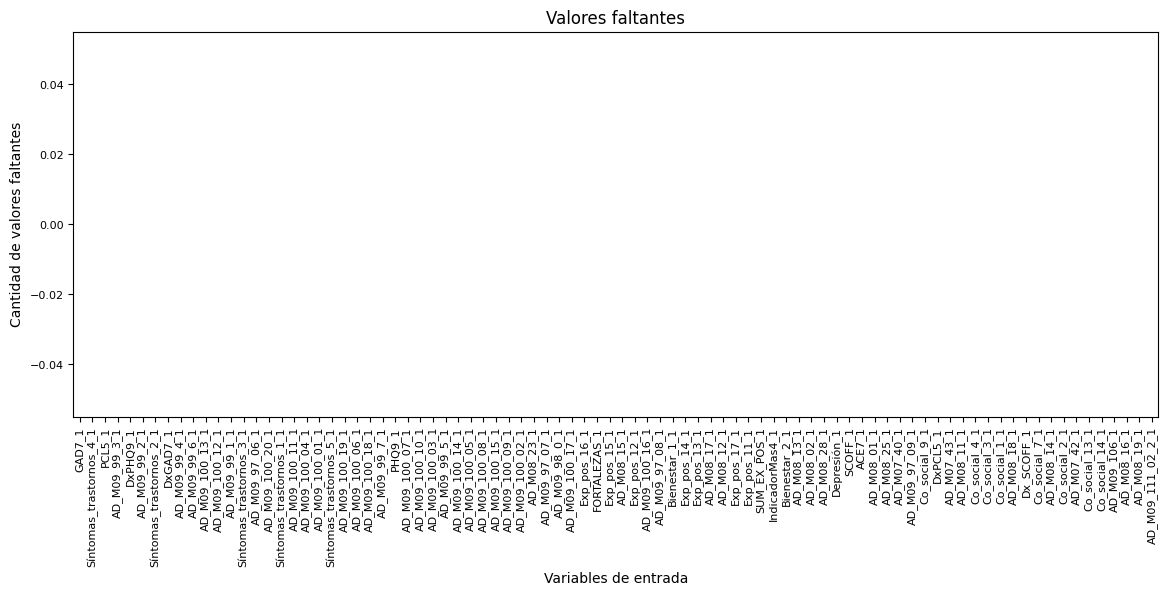

In [232]:
# Calculamos la cantidad de valores faltantes por sexo
valores_faltantes_por_sexo = x_train.apply(lambda x: x.isnull().sum())

# Creamos una gráfica de barras con el conteo de los valores faltantes
valores_faltantes_por_sexo.plot(kind='bar', stacked=False,fontsize=8,rot=90,figsize=(14,5))
plt.title('Valores faltantes',fontsize=12)
plt.xlabel('Variables de entrada',fontsize=10)
plt.ylabel('Cantidad de valores faltantes',fontsize=10)
plt.show()

In [233]:
# Revisamos los % de valores faltantes por columna
faltantes = (pd.isnull(x_train).sum()/x_train.shape[0])*100
faltantes = faltantes.sort_values(ascending=False)
faltantes

GAD7_1               0.0
SUM_EX_POS_1         0.0
ACE7_1               0.0
SCOFF_1              0.0
Depresión_1          0.0
                    ... 
AD_M09_100_10_1      0.0
AD_M09_100_07_1      0.0
PHQ9_1               0.0
AD_M09_99_7_1        0.0
AD_M09_111_02_2_1    0.0
Length: 86, dtype: float64

In [234]:
# Generamos un resumen estadístico de las variables de entrada

x_train.describe()

,GAD7_1,Síntomas_trastornos_4_1,PCL5_1,AD_M09_99_3_1,DxPHQ9_1,AD_M09_99_2_1,Síntomas_trastornos_2_1,DxGAD7_1,AD_M09_99_4_1,AD_M09_99_6_1,...,Co_social_7_1,AD_M08_14_1,Co_social_2_1,AD_M07_42_1,Co_social_13_1,Co_social_14_1,AD_M09_106_1,AD_M08_16_1,AD_M08_19_1,AD_M09_111_02_2_1
count,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,...,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000,1468.000000
mean,0.626022,0.547003,0.600136,0.566757,0.660763,0.608311,0.602861,0.696866,0.653270,0.623297,...,0.596049,0.826294,0.582425,0.670300,0.544278,0.585150,0.745232,0.829700,0.839237,0.651907
std,0.484023,0.497955,0.490037,0.495692,0.473612,0.488294,0.489472,0.459769,0.476091,0.484725,...,0.490855,0.378985,0.493327,0.470264,0.498205,0.492864,0.435879,0.376024,0.367437,0.476528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [235]:
"""Visualizamos los tipos de caracteres. A pesar de ser tipo flotante o enteros,
por la naturaleza de la información la mayoría son datos de tipo categórico.
Solamente PROSOCIALIDAD y SUM_EXP_POS serán considerados como numéricos, ya que
son métricas acumuladas de las encuestas realizadas"""

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   GAD7_1                   1468 non-null   uint8
 1   Síntomas_trastornos_4_1  1468 non-null   int64
 2   PCL5_1                   1468 non-null   uint8
 3   AD_M09_99_3_1            1468 non-null   int64
 4   DxPHQ9_1                 1468 non-null   uint8
 5   AD_M09_99_2_1            1468 non-null   int64
 6   Síntomas_trastornos_2_1  1468 non-null   int64
 7   DxGAD7_1                 1468 non-null   uint8
 8   AD_M09_99_4_1            1468 non-null   int64
 9   AD_M09_99_6_1            1468 non-null   int64
 10  AD_M09_100_13_1          1468 non-null   int64
 11  AD_M09_100_12_1          1468 non-null   int64
 12  AD_M09_99_1_1            1468 non-null   int64
 13  Síntomas_trastornos_3_1  1468 non-null   int64
 14  AD_M09_97_06_1           1468 non-null   int64
 15  AD_M

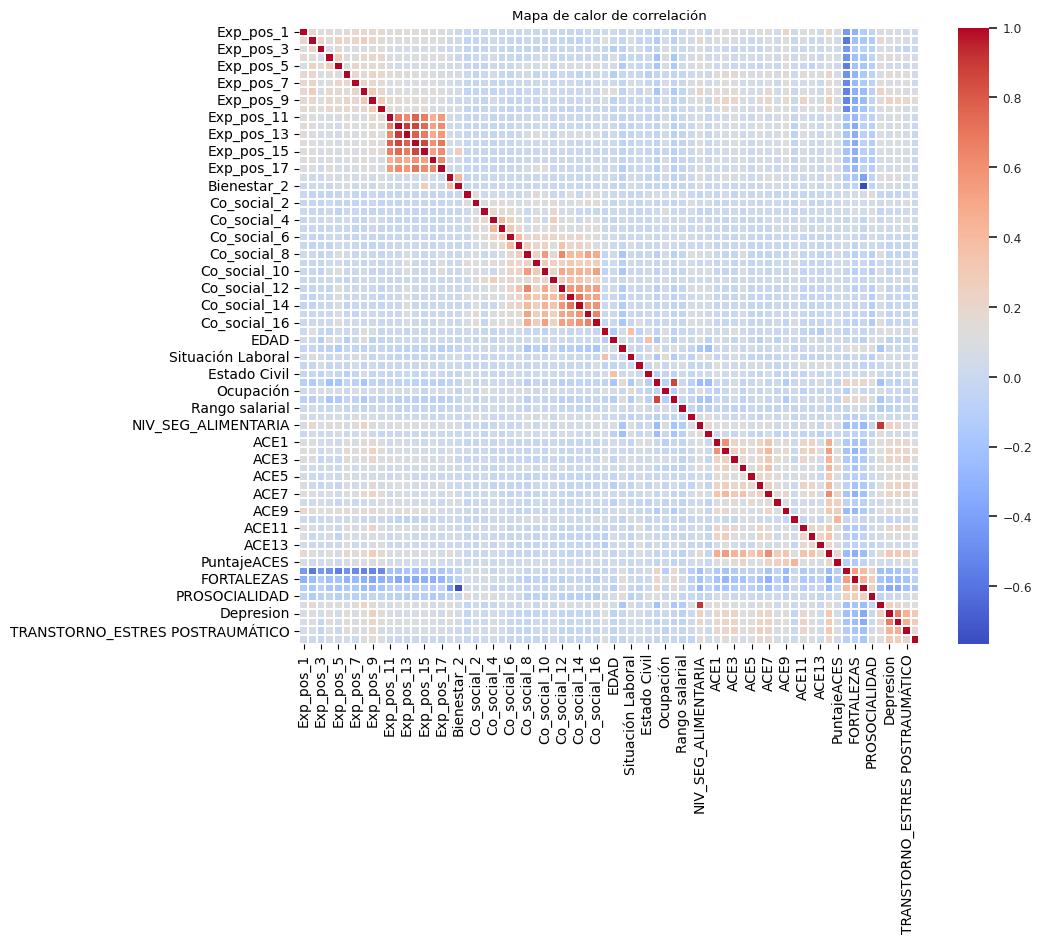

In [ ]:

# Calculamos la matriz de correlación
correlation_matrix = df_adultos_new.corr(method='pearson')

# Creamos un mapa de calor de la matriz de correlación

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.05)
plt.title('Mapa de calor de correlación')
plt.show()


De la matriz de correlación vemos que las experiencias positivas tienen cierta correlación negativa con las experiencias adversas, sin embargo uno de los objetivos de nuestro proyecto es ponderar cuáles de las experiencias positivas tienen un mayor efecto de mitigación de las patologías etiquetadas. Así mismo, pudimos notar que entre mayor inseguridad alimentaria se tiene (NIV_SEG_ALIMENTARIA), hay una clara correlación con el trastorno de depresión. Por otro lado, inicialmente asumíamos que una mayor cohesión social (Co_social) tendría cierto beneficio para redicir las enfermedades psicológicas, pero no se puede identificar ninguna correlación claramente.

A continuación utilizamos Pandas Profiling como una herramienta automática para realizar el análisis EDA, sin embargo seleccionaremos un sub-conjunto de datos, ya que los recursos de cómputo con los que contamos en Google Colab son limitados.

In [ ]:
#!pip install ydata_profiling --upgrade

In [ ]:
#pip install pandas-profiling

In [ ]:
#!pip install typing_extensions

In [ ]:
# probamos con un subset de datos más pequeño para correrlo en Pandas Profiling
df_adultos_new.drop(columns=['INDIGENA', 'Situación Laboral', 'Religiosidad', 'Estado Civil',
       'Estudios padres', 'Ocupación', 'ESCOLARIDAD', 'Rango salarial',
       'Servicio de salud','ACE1', 'ACE2', 'ACE3', 'ACE4', 'ACE5',
       'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'ACE11', 'ACE12', 'ACE13',
       'ACE_mas_4', 'PuntajeACES','Co_social_1', 'Co_social_2', 'Co_social_3', 'Co_social_4',
       'Co_social_5', 'Co_social_6', 'Co_social_7', 'Co_social_8',
       'Co_social_9', 'Co_social_10', 'Co_social_11', 'Co_social_12',
       'Co_social_13', 'Co_social_14', 'Co_social_15', 'Co_social_16'],inplace=True)

In [ ]:
df_adultos_new.columns

Index(['Exp_pos_1', 'Exp_pos_2', 'Exp_pos_3', 'Exp_pos_4', 'Exp_pos_5',
       'Exp_pos_6', 'Exp_pos_7', 'Exp_pos_8', 'Exp_pos_9', 'Exp_pos_10',
       'Exp_pos_11', 'Exp_pos_12', 'Exp_pos_13', 'Exp_pos_14', 'Exp_pos_15',
       'Exp_pos_16', 'Exp_pos_17', 'Bienestar_1', 'Bienestar_2', 'SEXO',
       'EDAD', 'NIV_SEG_ALIMENTARIA', 'AREA', 'EX_BENEVOLENTES', 'FORTALEZAS',
       'FELICIDAD', 'PROSOCIALIDAD', 'SUM_EX_POS', 'Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA'],
      dtype='object')

In [248]:
from ydata_profiling import ProfileReport
#from pandas_profiling import ProfileReport


report = ProfileReport(df_adultos2)

report.to_notebook_iframe()



ModuleNotFoundError: No module named 'ydata_profiling'

Del análisis automático realizado por Pandas Profiling, vemos que las variables de salida están claramente desbalanceadas, teniendo una mayor concentración de datos en los grados moderados de las enfermedades en todos los casos. Podemos ver que las severidades ascienden en magnitud en las categorías etiquetadas (1 a 5), por lo que será necesario convertir dichas categorías en variables separadas para facilitar su procesamiento al asignar la clase a predecir, de manera que tendremos múltiples variables de salida.

En el análisis bivariable que realiza vemos que la Prosocialidad aumenta a partir de los 30 años de edad y es prácticamente nula en edades más tempranas. También vemos que las experiencias positivas se dan desde los 8 ó 10 años de edad,contribuyendo a una mayor percepción de felicidad por los encuestados.

In [246]:
# Análisis multivariable: creamos gráficas Pair Plot para un sub-conjunto
# de variables de entrada y salida:

VARS = ['Bienestar_1', 'Bienestar_2','NIV_SEG_ALIMENTARIA',
        'Depresion', 'Ansiedad',
       'TRANSTORNO_ESTRES POSTRAUMÁTICO', 'SOSPECHA DE ANOREXIA/BULIMIA']

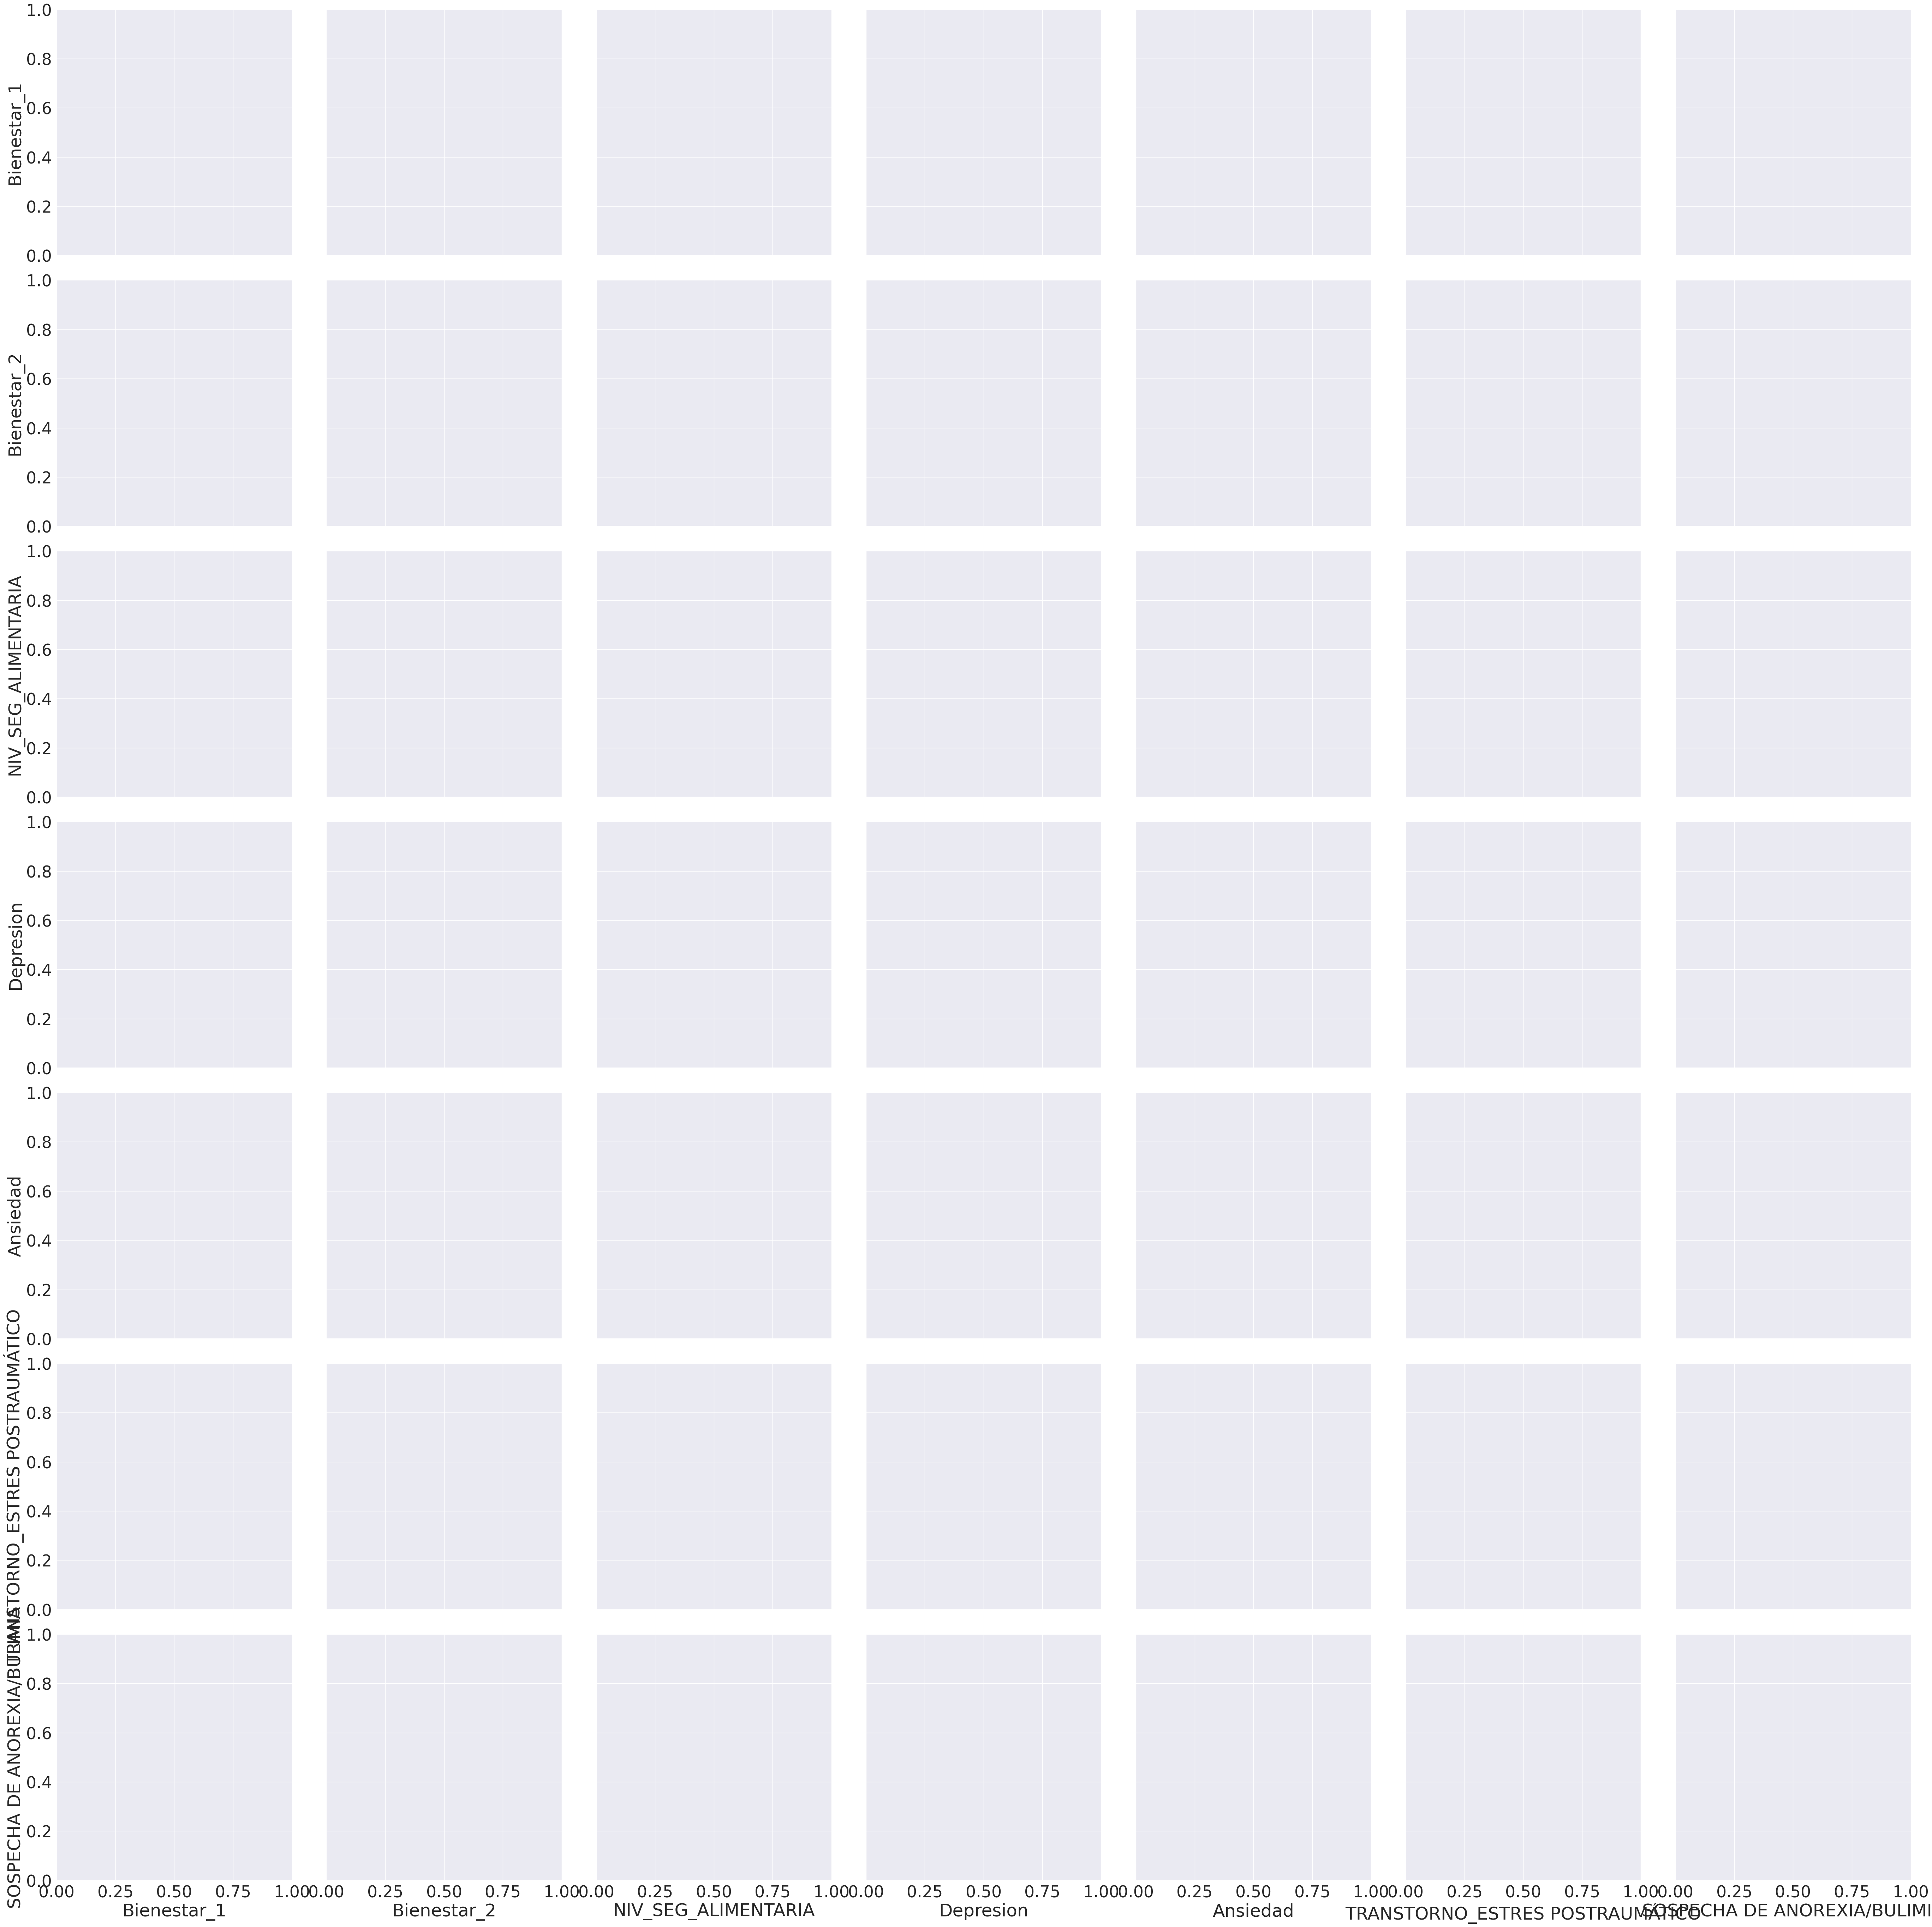

In [247]:
# Gráfica pair plot, vemos en la diagonal los histogramas que reflejan las
# diferentes categorías por variable.

sns.set(font_scale=3)

sns.pairplot(df_adultos2,vars = VARS, kind="reg",height=8)
#fig, ax = plt.subplots(figsize=(20, 20))
plt.show()

In [237]:
# Identificamos las columnas numéricas y categóricas
numeric_columns = x_train.select_dtypes(include=np.number).columns
numeric_columns


Index(['GAD7_1', 'Síntomas_trastornos_4_1', 'PCL5_1', 'AD_M09_99_3_1',
       'DxPHQ9_1', 'AD_M09_99_2_1', 'Síntomas_trastornos_2_1', 'DxGAD7_1',
       'AD_M09_99_4_1', 'AD_M09_99_6_1', 'AD_M09_100_13_1', 'AD_M09_100_12_1',
       'AD_M09_99_1_1', 'Síntomas_trastornos_3_1', 'AD_M09_97_06_1',
       'AD_M09_100_20_1', 'Síntomas_trastornos_1_1', 'AD_M09_100_11_1',
       'AD_M09_100_04_1', 'AD_M09_100_01_1', 'Síntomas_trastornos_5_1',
       'AD_M09_100_19_1', 'AD_M09_100_06_1', 'AD_M09_100_18_1',
       'AD_M09_99_7_1', 'PHQ9_1', 'AD_M09_100_07_1', 'AD_M09_100_10_1',
       'AD_M09_100_03_1', 'AD_M09_99_5_1', 'AD_M09_100_14_1',
       'AD_M09_100_05_1', 'AD_M09_100_08_1', 'AD_M09_100_15_1',
       'AD_M09_100_09_1', 'AD_M09_100_02_1', 'AD_M08_23_1', 'AD_M09_97_07_1',
       'AD_M09_98_0_1', 'AD_M09_100_17_1', 'Exp_pos_16_1', 'FORTALEZAS_1',
       'Exp_pos_15_1', 'AD_M08_15_1', 'Exp_pos_12_1', 'AD_M09_100_16_1',
       'AD_M09_97_08_1', 'Bienestar_1_1', 'Exp_pos_14_1', 'Exp_pos_13_1',


In [238]:
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns

numeric_columns

Index(['Síntomas_trastornos_4_1', 'AD_M09_99_3_1', 'AD_M09_99_2_1',
       'Síntomas_trastornos_2_1', 'AD_M09_99_4_1', 'AD_M09_99_6_1',
       'AD_M09_100_13_1', 'AD_M09_100_12_1', 'AD_M09_99_1_1',
       'Síntomas_trastornos_3_1', 'AD_M09_97_06_1', 'AD_M09_100_20_1',
       'Síntomas_trastornos_1_1', 'AD_M09_100_11_1', 'AD_M09_100_04_1',
       'AD_M09_100_01_1', 'Síntomas_trastornos_5_1', 'AD_M09_100_19_1',
       'AD_M09_100_06_1', 'AD_M09_100_18_1', 'AD_M09_99_7_1',
       'AD_M09_100_07_1', 'AD_M09_100_10_1', 'AD_M09_100_03_1',
       'AD_M09_99_5_1', 'AD_M09_100_14_1', 'AD_M09_100_05_1',
       'AD_M09_100_08_1', 'AD_M09_100_15_1', 'AD_M09_100_09_1',
       'AD_M09_100_02_1', 'AD_M08_23_1', 'AD_M09_97_07_1', 'AD_M09_98_0_1',
       'AD_M09_100_17_1', 'Exp_pos_16_1', 'Exp_pos_15_1', 'AD_M08_15_1',
       'Exp_pos_12_1', 'AD_M09_100_16_1', 'AD_M09_97_08_1', 'Bienestar_1_1',
       'Exp_pos_14_1', 'Exp_pos_13_1', 'AD_M08_17_1', 'AD_M08_12_1',
       'Exp_pos_17_1', 'Exp_pos_11_1', '

In [239]:
# Seleccionamos las columnas categóricas

df_categorical_columns = x_train.select_dtypes(exclude=['int64', 'float64']).columns

df_categorical_columns


Index(['GAD7_1', 'PCL5_1', 'DxPHQ9_1', 'DxGAD7_1', 'PHQ9_1', 'FORTALEZAS_1',
       'SUM_EX_POS_1', 'IndicadorMas4_1', 'SCOFF_1', 'ACE7_1', 'DxPCL5_1',
       'Dx_SCOFF_1'],
      dtype='object')

In [ ]:
''' Aplicamos las transformaciones sobre variables numéricas con sesgo
en su histograma.'''

import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Lista de variables a transformar
variables_a_transformar = numeric_columns

# Crear subgráficos para todas las variables
fig, axs = plt.subplots(len(variables_a_transformar), 2, figsize=(8, len(variables_a_transformar) * 2))

# Iterar sobre la lista de variables
for i, variable in enumerate(variables_a_transformar):

    # Obtener la serie de la variable original
    original_data = x_train[variable]

    # Aplicar la transformación de Box-Cox
    transformed_data, lambda_value = boxcox(original_data + 1)  # Se suma 1 para manejar valores no positivos

    # Crear histograma para la distribución original
    axs[i, 0].hist(original_data, bins=20, color='b', alpha=0.7)
    axs[i, 0].set_title(f'Distribución original de {variable}', fontsize=8)

    # Crear histograma para la distribución transformada
    axs[i, 1].hist(transformed_data, bins=20, color='r', alpha=0.7)
    axs[i, 1].set_title(f'Distribución transformada de {variable} (Box-Cox)', fontsize=8)

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()


In [ ]:
# Visualizamos los datos de entrada atípicos con una gráfica tipo Box-Plot

x_train.plot(kind='box',fontsize=8,rot=90,figsize=(14,5))
plt.title('box plot ', fontsize=12)
plt.ylabel('Respuestas', fontsize=10)
plt.show()

In [244]:
# Removemos outliers
# Iteramos a través de cada columna
for col in x_train.columns:
    if pd.api.types.is_numeric_dtype(x_train[col]):  # Verificar si la columna es de tipo numérico
        Q1 = x_train[col].quantile(0.25)
        Q3 = x_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        x_train = x_train[(x_train[col] >= lower_bound) & (x_train[col] <= upper_bound)]

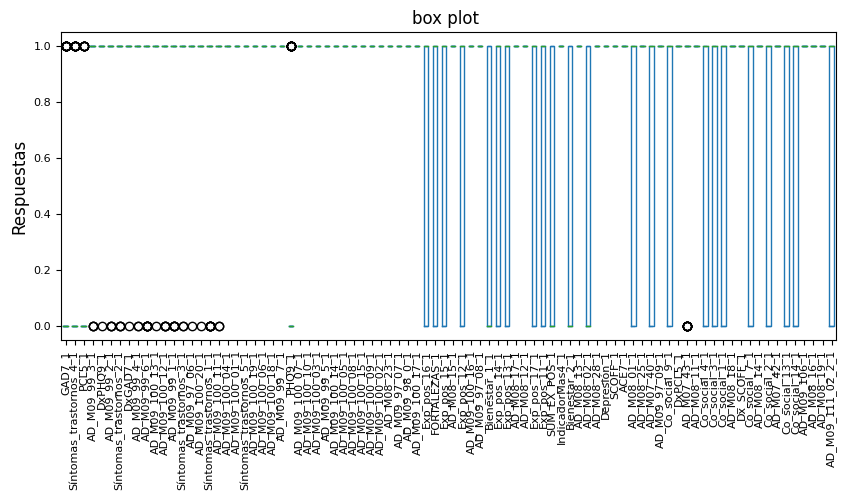

In [245]:
# Verificamos con gráfica box plot nuevamente:

x_train.plot(kind='box',fontsize=8,rot=90,figsize=(10,4))
plt.title('box plot ',fontsize=12)
plt.ylabel('Respuestas',fontsize=12)
plt.show()

En general, consideramos que la información después del pre-procesamiento es de una calidad aceptable para utilizarla en modelos de aprendizaje automático, considerando que algunas columnas reflejan la valoración que hicieron los expertos en la materia sobre el diagnóstico objetivo de las patologías etiquetadas después de analizar las respuestas proporcionadas por los encuestados.

Finalmente, debido a que se trata de datos categóricos en su mayoría, no consideramos que se tengan que normalizar, ya que necesitamos que cada categoría se conserve con su magnitud original para entender la importancia de cada variable en el resultado final.


**Referencias:**

Mukhiya, S. K., & Ahmed, U. (2020). *Hands-On Exploratory Data Analysis with Python*. Packt Publishing.

Sangani, R. (2021). *Dealing with features that have high cardinality*. Towards Data Science. https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b